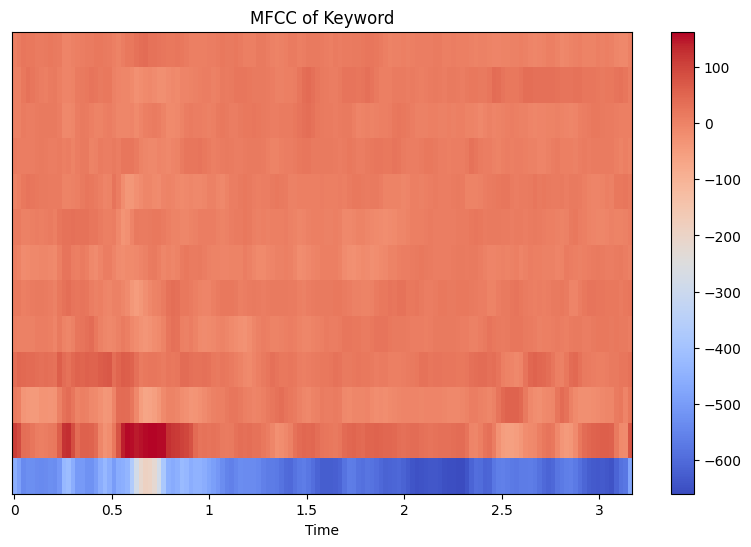

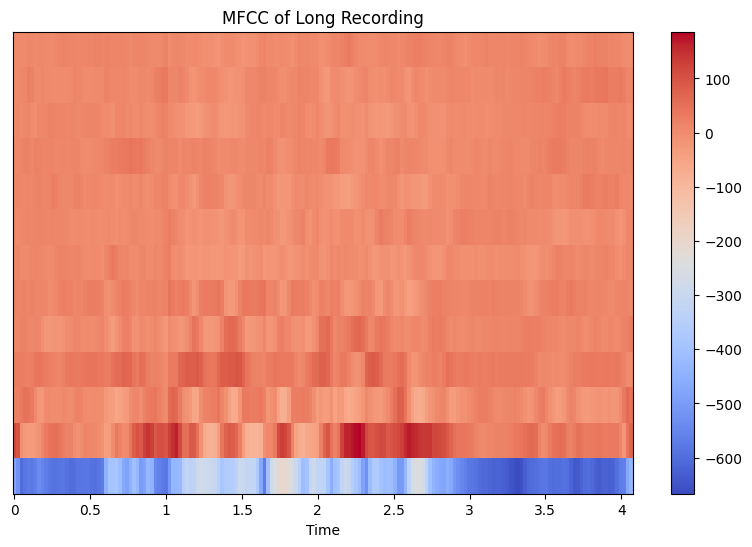

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from librosa.display import specshow

def extract_mfcc(audio_path, sr=22050, n_mfcc=13, hop_length=512):
    y, sr = librosa.load(audio_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length)
    return mfcc, sr

def plot_mfcc(mfcc, sr, hop_length, title='MFCC'):
    plt.figure(figsize=(10, 6))
    specshow(mfcc, sr=sr, hop_length=hop_length, x_axis='time')
    plt.colorbar()
    plt.title(title)
    plt.show()

# Example usage
keyword_path = 'keyword.wav'
long_recording_path = 'long_recording.wav'

mfcc_keyword, sr_keyword = extract_mfcc(keyword_path)
mfcc_long_recording, sr_long_recording = extract_mfcc(long_recording_path)

plot_mfcc(mfcc_keyword, sr_keyword, 512, title='MFCC of Keyword')
plot_mfcc(mfcc_long_recording, sr_long_recording, 512, title='MFCC of Long Recording')

In [12]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from librosa.sequence import dtw

# Load audio files
keyword, sr_keyword = librosa.load('keyword.wav')
long_recording, sr_long = librosa.load('long_recording.wav')

# Compute MFCCs
mfcc_keyword = librosa.feature.mfcc(y=keyword, sr=sr_keyword)
mfcc_long_recording = librosa.feature.mfcc(y=long_recording, sr=sr_long)

def find_keyword_in_recording(mfcc_keyword, mfcc_long_recording):
    # Compute the distance matrix between the keyword and long recording
    D = cdist(mfcc_keyword.T, mfcc_long_recording.T, metric='euclidean')
    
    # Compute the DTW cost matrix and the optimal path
    cost, path = dtw(D)
    
    # The cost can be used to decide if the keyword is present or not
    return cost, path

# Example usage
cost, path = find_keyword_in_recording(mfcc_keyword, mfcc_long_recording)

print(f"DTW cost: {cost}")

# Visualize the alignment
plt.figure(figsize=(10, 6))
plt.imshow(D.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')  # path[0] is keyword index, path[1] is long recording index
plt.title('DTW Cost and Path')
plt.colorbar()
plt.show()

ParameterError: If C is not supplied, both X and Y must be supplied

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from librosa.sequence import dtw

def find_keyword_in_recording(mfcc_keyword, mfcc_long_recording):
    # Compute the distance matrix between the keyword and long recording
    D = cdist(mfcc_keyword.T, mfcc_long_recording.T, metric='euclidean')
    
    # Compute the DTW cost matrix and the optimal path
    D = D.T  # Transpose D to match librosa's dtw input requirements
    dtw_output = dtw(C=D, backtrack=True)
    
    # Extract cost and path from dtw_output
    cost = dtw_output.cost
    path = dtw_output.path
    
    return cost, path

# Example usage (assuming you have mfcc_keyword and mfcc_long_recording)
mfcc_keyword = r"keyword.wav"
mfcc_long_recording = r"long_recording.wav"

cost, path = find_keyword_in_recording(mfcc_keyword, mfcc_long_recording)

print(f"DTW cost: {cost}")

# Visualize the alignment
plt.figure(figsize=(10, 6))
D = cdist(mfcc_keyword.T, mfcc_long_recording.T, metric='euclidean')
plt.imshow(D.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[:, 0], path[:, 1], 'w')  # path[:, 0] is keyword index, path[:, 1] is long recording index
plt.title('DTW Cost and Path')
plt.colorbar()
plt.show()